# **Machine Learning Classification**

In this Project I will using this dataset from kaggle:
https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

Using different Model:
*   KMeans
*   Agglomerative Clustering
*   DBSCAN
*   Mean Shift

All of model will be imported from sklearn.cluster libray






I will import the libray

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift

## Import The Datase

In [ ]:
data=pd.read_csv('/content/Mall_Customers.csv')

Using .head() to look at the data

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploratory Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Using .info() to explore the data, we got:


1.   There are 5 Columns
2.   There are 200 rows
3.   All columns are non-null
4.   There are 4 columns with int type (CustomerID,Age,Annual Income,Spending Score
1.   There is 1 column with object type (Gender)
2.   File using 7.9 KB of memory






In [ ]:
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In Gender Column we have to 2 unique value male and female 

In [ ]:
data.Gender.value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

And the proportion of female is 56% while Male is 44%, Lets take a look at the visualize data

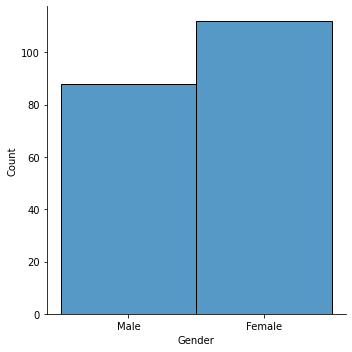

In [ ]:
sns.displot(data.Gender)

How about the Age column

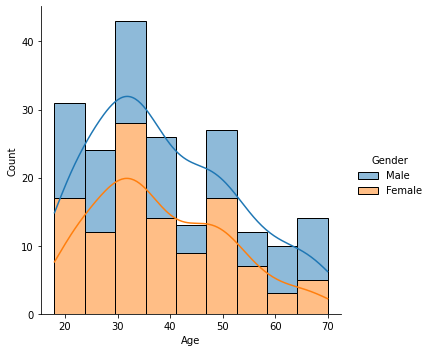

In [ ]:
sns.displot(data=data,x='Age',hue='Gender',multiple="stack",kde=True)

The Distribution is right skewed, while at it, lets check skew for all column

Before that, I will drop the customerid column 

In [ ]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
data=data.drop(columns='CustomerID',axis=1)

Now, for Skewed Column

In [ ]:
num_col=[x for x in data.columns if x not in ['Gender']]
skew_col=data[num_col].skew().sort_values(ascending=False)
skew_col

Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

Its less than 0.5 so I decided to ignore the skewness 

Transform the gender from object to int

In [ ]:
data['Gender']=data['Gender'].replace('Male',1)
data['Gender']=data['Gender'].replace('Female',0)

In [ ]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


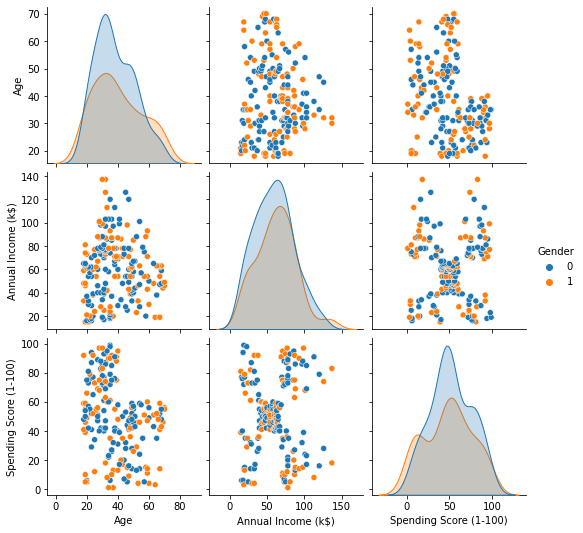

In [ ]:
sns.pairplot(data=data,hue='Gender')

Lets check if the data has outlier in it

In [ ]:
data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


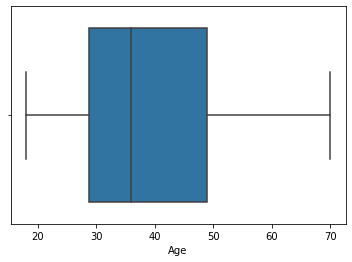

In [ ]:
sns.boxplot(data['Age'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


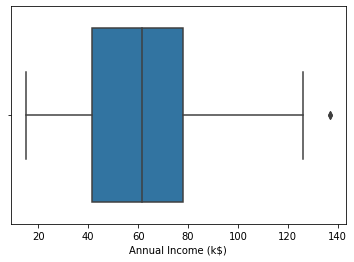

In [ ]:
sns.boxplot(data['Annual Income (k$)'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


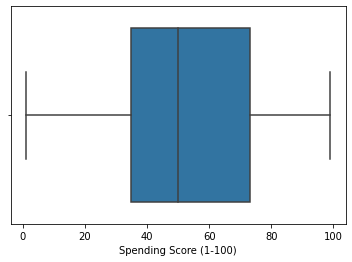

In [ ]:
sns.boxplot(data['Spending Score (1-100)'])

There are some outlier in the Data

## Using Machine Learning Clustering

### KMeans

In [117]:
Inertia_score=[]
n_number=list(range(1,101))
for x in range (1,101):
  kmeans=KMeans(n_clusters=x)
  kmeans.fit(data)
  Inertia_score.append(kmeans.inertia_)


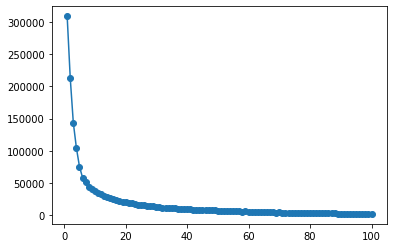

<Figure size 2160x1440 with 0 Axes>

In [121]:
plt.plot(n_number,Inertia_score)
plt.scatter(n_number,Inertia_score)

Lets try again but using less n input

In [122]:
Inertia_score=[]
n_number=list(range(1,21))
for x in range (1,21):
  kmeans=KMeans(n_clusters=x)
  kmeans.fit(data)
  Inertia_score.append(kmeans.inertia_)


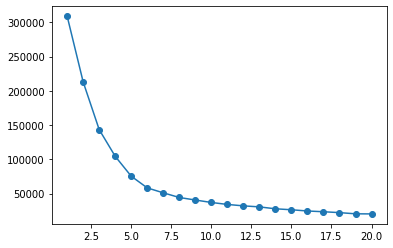

In [123]:
plt.plot(n_number,Inertia_score)
plt.scatter(n_number,Inertia_score)

If you look at the line plot, There is a break line in number 6 as the line coming into linear after that

Using n = 6 for KMeans

In [129]:
km=KMeans(n_clusters=6)
km=km.fit(data)
data['Cluster']=km.predict(data)

In [133]:
data['Gender']=data['Gender'].replace(1,'Male')
data['Gender']=data['Gender'].replace(0,'Female')
data.groupby(['Cluster','Gender']).mean()

Age  Annual Income (k$)  Spending Score (1-100)
Cluster Gender                                                       
0       Female  44.600000           92.333333               21.600000
        Male    39.500000           85.150000               14.050000
1       Female  54.080000           53.240000               49.520000
        Male    59.315789           54.315789               49.210526
2       Female  25.461538           25.692308               80.538462
        Male    25.000000           25.777778               77.666667
3       Female  32.190476           86.047619               81.666667
        Male    33.277778           87.111111               82.666667
4       Female  41.538462           26.538462               20.692308
        Male    48.333333           24.666667               19.666667
5       Female  27.960000           57.360000               47.120000
        Male    25.153846           55.307692               53.000000

Now, if we look at the data and ignore the gender because the different are small enough, we can conclude the 6 Cluster are:


1.   Cluster 0: Age 40 with High Income but Small Spending
2.   Cluster 1: Age 50+ with Middle Income and Middle Spending
1.   Cluster 2: Age 25 with Small Income but High Spending
2.   Cluster 3: age 30 with High Income and High Spending
1.   Cluster 4: age 40 with Small Income and Small Spending
2.   Cluster 5: Age 25 with Middle Income and Middle Spending







From this data, Age 25-30 actually spending big number regardless their income. while 40+ spend the same as their income or less than the income

### Agglomerative Clustering

In [139]:
data2=pd.read_csv('/content/Mall_Customers.csv')
data2=data2.drop(columns='CustomerID',axis=1)
data2['Gender']=data2['Gender'].replace('Male',1)
data2['Gender']=data2['Gender'].replace('Female',0)
agg=AgglomerativeClustering(n_clusters=6)
data2['Cluster']=agg.fit_predict(data2)

In [141]:
data2['Gender']=data2['Gender'].replace(1,'Male')
data2['Gender']=data2['Gender'].replace(0,'Female')
data2.groupby(['Cluster','Gender']).mean()

Age  Annual Income (k$)  Spending Score (1-100)
Cluster Gender                                                       
0       Female  44.600000           92.333333               21.600000
        Male    39.500000           85.150000               14.050000
1       Female  50.300000           55.700000               49.500000
        Male    57.380952           54.285714               49.428571
2       Female  32.190476           86.047619               81.666667
        Male    33.277778           87.111111               82.666667
3       Female  25.583333           24.583333               81.833333
        Male    23.750000           25.500000               79.750000
4       Female  43.214286           27.357143               21.714286
        Male    48.333333           24.666667               19.666667
5       Female  25.050000           54.750000               48.050000
        Male    23.666667           53.250000               53.916667

Its same as KMeans model

### DBSCAN

In [142]:
data3=pd.read_csv('/content/Mall_Customers.csv')
data3=data3.drop(columns='CustomerID',axis=1)
data3['Gender']=data3['Gender'].replace('Male',1)
data3['Gender']=data3['Gender'].replace('Female',0)
db=DBSCAN(eps=3,min_samples=3)
data3['Cluster']=db.fit_predict(data3)

In [143]:
data3['Gender']=data3['Gender'].replace(1,'Male')
data3['Gender']=data3['Gender'].replace(0,'Female')
data3.groupby(['Cluster','Gender']).mean()

Age  Annual Income (k$)  Spending Score (1-100)
Cluster Gender                                                       
-1      Female  38.018692           59.074766               51.663551
        Male    39.345238           62.214286               48.500000
 0      Female  48.000000           61.000000               47.500000
        Male    48.000000           60.000000               49.000000
 1      Female  66.000000           63.000000               50.000000
        Male    65.500000           63.000000               50.000000
 2      Female  18.500000           65.000000               49.000000
        Male    19.000000           64.000000               46.000000

While DBSCAN has 4 cluster:


1.   Cluster -1 Age 30-40 with middle income and middle spending
2.   Cluster 0 Age with 40-50 with middle income and middle spending
1.   Cluster 1 Age 60+ middle income and middle spending
2.   Cluster 2 Age 20-30 middle income and middle spending





DBSCAN can cluster it well for Age but the income and spending are almost the same for all cluster

Change the eps and min_sample will give different result, for example:

In [145]:
data3=pd.read_csv('/content/Mall_Customers.csv')
data3=data3.drop(columns='CustomerID',axis=1)
data3['Gender']=data3['Gender'].replace('Male',1)
data3['Gender']=data3['Gender'].replace('Female',0)
db=DBSCAN(eps=5,min_samples=3)
data3['Cluster']=db.fit_predict(data3)

data3['Gender']=data3['Gender'].replace(1,'Male')
data3['Gender']=data3['Gender'].replace(0,'Female')
data3.groupby(['Cluster','Gender']).mean()

Age  Annual Income (k$)  Spending Score (1-100)
Cluster Gender                                                       
-1      Female  38.054795           59.849315               49.958904
        Male    39.557377           65.442623               45.295082
 0      Female  23.000000           17.666667               76.666667
        Male    21.500000           17.500000               80.000000
 1      Female  50.000000           42.250000               50.500000
        Male    53.000000           46.000000               46.000000
 2      Male    18.666667           47.333333               57.666667
 3      Female  65.000000           48.333333               49.666667
        Male    64.666667           49.166667               51.000000
 4      Female  23.250000           56.250000               53.500000
        Male    25.333333           58.666667               53.666667
 5      Female  48.200000           57.600000               45.400000
        Male    48.000000           57.000000               47.500000
 6      Female  20.000000           63.400000               47.000000
        Male    19.000000           61.333333               45.333333
 7      Female  66.000000           63.000000               50.000000
        Male    65.500000           63.000000               50.000000
 8      Female  38.666667           63.666667               40.666667
 9      Female  49.500000           66.000000               58.000000
        Male    49.000000           62.000000               56.000000
 10     Female  31.600000           75.800000               73.600000
        Male    32.000000           73.000000               73.000000
 11     Female  30.500000           74.500000               87.500000
        Male    33.000000           76.500000               91.500000
 12     Female  45.500000           78.000000               18.000000
        Male    43.000000           78.000000               17.000000

Finding the best eps and min_sample are the key

### Mean Shift

In [149]:
data4=pd.read_csv('/content/Mall_Customers.csv')
data4=data4.drop(columns='CustomerID',axis=1)
data4['Gender']=data4['Gender'].replace('Male',1)
data4['Gender']=data4['Gender'].replace('Female',0)
ms=MeanShift(bandwidth=4)
data4['Cluster']=db.fit_predict(data4)

data4['Gender']=data3['Gender'].replace(1,'Male')
data4['Gender']=data3['Gender'].replace(0,'Female')
data4.groupby(['Cluster','Gender']).mean()

Age  Annual Income (k$)  Spending Score (1-100)
Cluster Gender                                                       
-1      Female  38.054795           59.849315               49.958904
        Male    39.557377           65.442623               45.295082
 0      Female  23.000000           17.666667               76.666667
        Male    21.500000           17.500000               80.000000
 1      Female  50.000000           42.250000               50.500000
        Male    53.000000           46.000000               46.000000
 2      Male    18.666667           47.333333               57.666667
 3      Female  65.000000           48.333333               49.666667
        Male    64.666667           49.166667               51.000000
 4      Female  23.250000           56.250000               53.500000
        Male    25.333333           58.666667               53.666667
 5      Female  48.200000           57.600000               45.400000
        Male    48.000000           57.000000               47.500000
 6      Female  20.000000           63.400000               47.000000
        Male    19.000000           61.333333               45.333333
 7      Female  66.000000           63.000000               50.000000
        Male    65.500000           63.000000               50.000000
 8      Female  38.666667           63.666667               40.666667
 9      Female  49.500000           66.000000               58.000000
        Male    49.000000           62.000000               56.000000
 10     Female  31.600000           75.800000               73.600000
        Male    32.000000           73.000000               73.000000
 11     Female  30.500000           74.500000               87.500000
        Male    33.000000           76.500000               91.500000
 12     Female  45.500000           78.000000               18.000000
        Male    43.000000           78.000000               17.000000

Actuallu using mean shift resulting in 14 cluster, but if we look at the detail, it give us much more interesting fact

# Conclution

There are other model to use for Clustering. In this project using 4 model try to cluster and find the different.
Actually from this data using KMeans give the most interesting data. But Mean Shifting resulting 12 cluster maybe there are some hidden fact that need to explore again.
As I try using clustering, its hard to choose the parameter unlike supervised learning we know the result before predict. Unsupervised learning give us the new result.

Next project will be using the same dataset but exploring the 4 model and tuning the parameter to give us the best fact finding and customer segmentation